In [5]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
# Load Data
df = pd.read_csv("NFHS_5_India_Districts_Factsheet_Data.csv")

# Replace non-numeric values with NaN
df.replace(r'[*()\-,]', '', regex=True, inplace=True)

# Convert all possible columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')


In [250]:
df.head()

,District Names,State/UT,Number of Households surveyed,Number of Women age 15-49 years interviewed,Number of Men age 15-54 years interviewed,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Children under age 5 years whose birth was registered with the civil authority (%),...,Men age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%),Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%),Men age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%),Women (age 30-49 years) Ever undergone a screening test for cervical cancer (%),Women (age 30-49 years) Ever undergone a breast examination for breast cancer (%),Women (age 30-49 years) Ever undergone an oral cavity examination for oral cancer (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women age 15 years and above who consume alcohol (%),Men age 15 years and above who consume alcohol (%)
0,NaN,NaN,882,764,125,78.0,23.0,973,927,98.0,...,32.9,11.1,47.0,13.4,13.2,5.4,63.5,76.8,29.6,64.5
1,NaN,NaN,874,789,108,82.7,19.8,950,844,100.0,...,22.6,6.0,32.2,1.7,0.3,15.8,46.8,70.5,5.1,45.3
2,NaN,NaN,868,844,134,84.7,21.0,967,935,96.5,...,17.9,6.1,26.9,1.3,0.7,8.0,19.6,50.8,1.7,32.8
3,NaN,NaN,874,780,100,60.0,20.7,1140,1163,95.0,...,14.4,5.5,22.9,1.0,0.2,3.8,7.1,21.3,0.6,28.3
4,NaN,NaN,902,853,134,56.0,20.6,1114,898,95.4,...,14.8,6.4,25.1,4.9,0.6,7.3,11.4,21.5,0.8,32.3


In [252]:

# Apply KNN Imputer for missing values
imputer = KNNImputer(n_neighbors=5)
df.iloc[:, 2:] = imputer.fit_transform(df.iloc[:, 2:]) 


In [253]:
# Normalize numeric columns
scaler = MinMaxScaler()
df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19764\1411870524.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.86100386 0.85070785 0.84298584 0.85070785 0.88674389 0.84427284
 0.86872587 0.86357786 0.83912484 0.82110682 0.78249678 0.83912484
 0.8970399  0.84555985 0.86100386 0.83912484 0.89060489 0.96010296
 0.93564994 0.94851995 0.997426   0.92921493 0.98841699 0.99485199
 0.91634492 0.97168597 0.92535393 0.98198198 0.38996139 0.42342342
 0.96653797 0.94337194 0.998713   0.96138996 0.96267696 0.94208494
 0.88030888 0.90604891 0.9021879  0.9034749  0.9047619  0.90733591
 0.90862291 0.90990991 0.90862291 0.90733591 0.89317889 0.90604891
 0.89060489 0.9047619  0.8996139  0.87644788 0.88803089 0.86615187
 0.91119691 0.90733591 0.9047619  0.88545689 0.91248391 0.8996139
 0.87902188 0.90604891 0.90862291 0.91119691 0.91248391 0.90862291
 0.8957529  0.8996139  0.91119691 0.92792793 0.92792793 0.94079794
 0.8983269  0

In [256]:
# Rename target variable
anaemia_col = 'All women age 15-49 years who are anaemic22 (%)'
df.rename(columns={anaemia_col: 'anaemia_rate'}, inplace=True)


In [258]:
print(df.columns.tolist())


['District Names', 'State/UT', 'Number of Households surveyed', 'Number of Women age 15-49 years interviewed', 'Number of Men age 15-54 years interviewed', 'Female population age 6 years and above who ever attended school (%)', 'Population below age 15 years (%)', ' Sex ratio of the total population (females per 1,000 males)', 'Sex ratio at birth for children born in the last five years (females per 1,000 males)', 'Children under age 5 years whose birth was registered with the civil authority (%)', 'Deaths in the last 3 years registered with the civil authority (%)', 'Population living in households with electricity (%)', 'Population living in households with an improved drinking-water source1 (%)', 'Population living in households that use an improved sanitation facility2 (%)', 'Households using clean fuel for cooking3 (%)', 'Households using iodized salt (%)', 'Households with any usual member covered under a health insurance/financing scheme (%)', 'Children age 5 years who attended 

In [260]:
df = df.drop(columns=[col for col in df.columns if "anaemic22" in col], errors='ignore')


In [262]:
print(df.columns.tolist())


['District Names', 'State/UT', 'Number of Households surveyed', 'Number of Women age 15-49 years interviewed', 'Number of Men age 15-54 years interviewed', 'Female population age 6 years and above who ever attended school (%)', 'Population below age 15 years (%)', ' Sex ratio of the total population (females per 1,000 males)', 'Sex ratio at birth for children born in the last five years (females per 1,000 males)', 'Children under age 5 years whose birth was registered with the civil authority (%)', 'Deaths in the last 3 years registered with the civil authority (%)', 'Population living in households with electricity (%)', 'Population living in households with an improved drinking-water source1 (%)', 'Population living in households that use an improved sanitation facility2 (%)', 'Households using clean fuel for cooking3 (%)', 'Households using iodized salt (%)', 'Households with any usual member covered under a health insurance/financing scheme (%)', 'Children age 5 years who attended 

In [264]:
# Check correlation of anaemia-related columns with the target
anaemia_cols = [
    'Non-pregnant women age 15-49 years who are anaemic (<12.0 g/dl)22 (%)',
    'Pregnant women age 15-49 years who are anaemic (<11.0 g/dl)22 (%)',
   
]

# Compute correlation with target
correlation_with_target = df[anaemia_cols + ['anaemia_rate']].corr()

print(correlation_with_target['anaemia_rate'].sort_values(ascending=False))


anaemia_rate                                                             1.000000
Non-pregnant women age 15-49 years who are anaemic (<12.0 g/dl)22 (%)    0.999306
Pregnant women age 15-49 years who are anaemic (<11.0 g/dl)22 (%)        0.687800
Name: anaemia_rate, dtype: float64


In [266]:
# Feature Selection using Random Forest Importance
X = df.drop(columns=['District Names', 'State/UT', 'anaemia_rate','Non-pregnant women age 15-49 years who are anaemic (<12.0 g/dl)22 (%)','Pregnant women age 15-49 years who are anaemic (<11.0 g/dl)22 (%)', 'All women age 15-19 years who are anaemic22 (%)'], errors='ignore')



In [268]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
df.head()

,District Names,State/UT,Number of Households surveyed,Number of Women age 15-49 years interviewed,Number of Men age 15-54 years interviewed,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Children under age 5 years whose birth was registered with the civil authority (%),...,Men age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%),Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%),Men age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%),Women (age 30-49 years) Ever undergone a screening test for cervical cancer (%),Women (age 30-49 years) Ever undergone a breast examination for breast cancer (%),Women (age 30-49 years) Ever undergone an oral cavity examination for oral cancer (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women age 15 years and above who consume alcohol (%),Men age 15 years and above who consume alcohol (%)
0,NaN,NaN,0.861004,0.390036,0.482143,0.605948,0.202312,0.377816,0.796795,0.958678,...,1.000000,0.550802,0.934343,0.577586,0.904110,0.341772,0.899291,0.948509,0.691589,0.942899
1,NaN,NaN,0.850708,0.407829,0.406250,0.693309,0.109827,0.337955,0.766570,1.000000,...,0.626812,0.278075,0.560606,0.073276,0.020548,1.000000,0.662411,0.863144,0.119159,0.661786
2,NaN,NaN,0.842986,0.446975,0.522321,0.730483,0.144509,0.367418,0.799709,0.927686,...,0.456522,0.283422,0.426768,0.056034,0.047945,0.506329,0.276596,0.596206,0.039720,0.478770
3,NaN,NaN,0.850708,0.401423,0.370536,0.271375,0.135838,0.667244,0.882739,0.896694,...,0.329710,0.251337,0.325758,0.043103,0.013699,0.240506,0.099291,0.196477,0.014019,0.412884
4,NaN,NaN,0.886744,0.453381,0.522321,0.197026,0.132948,0.622184,0.786235,0.904959,...,0.344203,0.299465,0.381313,0.211207,0.041096,0.462025,0.160284,0.199187,0.018692,0.471449


In [272]:
from sklearn.feature_selection import SelectFromModel

In [274]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Fit a RandomForest model for feature selection
feature_selector = RandomForestRegressor(n_estimators=100, random_state=42)
feature_selector.fit(X_train, y_train)

# Get feature importances
importances = feature_selector.feature_importances_

# Set a threshold 
threshold = np.percentile(importances, 50)

# Select features with importance above the threshold
selector = SelectFromModel(feature_selector, threshold=threshold, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names and their importance values
selected_features = X_train.columns[selector.get_support()]
selected_importances = importances[selector.get_support()]

# Create a DataFrame for better visualization
selected_features_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': selected_importances
}).sort_values(by='Importance', ascending=False)


print(f"Selected {len(selected_features_df)} Features:")
print(selected_features_df)

Selected 52 Features:
                                              Feature  Importance
41  Children age 6-59 months who are anaemic (<11....    0.409106
28  Children age 12-23 months who have received 3 ...    0.048493
5   Population living in households that use an im...    0.024266
42  Women  age 15 years and above with high (141-1...    0.021799
12  Women age 15-19 years who were already mothers...    0.019808
18  Health worker ever talked to female non-users ...    0.019516
15  Current Use of Family Planning Methods (Curren...    0.017798
21  Average out-of-pocket expenditure per delivery...    0.015768
16  Current Use of Family Planning Methods (Curren...    0.015715
39  Women (age 15-49 years) whose Body Mass Index ...    0.015514
37  Children under 5 years who are underweight (we...    0.014333
6        Households using clean fuel for cooking3 (%)    0.010697
0                       Number of Households surveyed    0.010676
51  Men age 15 years and above who consume alcohol... 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [275]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


In [276]:
X_train.columns = X_train.columns.str.replace(r'[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[\[\]<>]', '', regex=True)


In [280]:
print(X_train.columns)


Index(['Number of Households surveyed',
       'Number of Women age 15-49 years interviewed',
       'Number of Men age 15-54 years interviewed',
       'Female population age 6 years and above who ever attended school (%)',
       'Population below age 15 years (%)',
       ' Sex ratio of the total population (females per 1,000 males)',
       'Sex ratio at birth for children born in the last five years (females per 1,000 males)',
       'Children under age 5 years whose birth was registered with the civil authority (%)',
       'Deaths in the last 3 years registered with the civil authority (%)',
       'Population living in households with electricity (%)',
       ...
       'Men age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%)',
       'Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%)',
       'Men age 15 years and above w

In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define hyperparameter grids (excluding Linear Regression)
param_grids = {
    'DecisionTreeRegressor': {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20],
        'min_samples_split': [2, 5, 10],
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1]
    },
    'Extra Trees': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
    }
}

# Define models (Linear Regression is included but not tuned)
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Dictionary to store best models
best_models = {}
best_params = {}

# Perform GridSearchCV for all models except Linear Regression
for name, model in models.items():
    if name == 'LinearRegression':
        best_models[name] = model.fit(X_train, y_train)
        print(f"Skipping hyperparameter tuning for {name}")
    else:
        print(f"Training {name} with GridSearchCV...")
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='r2', verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Store best model and parameters
        best_models[name] = grid_search.best_estimator_
        best_params[name] = grid_search.best_params_

        print(f"Best Params for {name}: {grid_search.best_params_}")
        print(f"Best R2 Score for {name}: {grid_search.best_score_}\n")

# Evaluate on test set
results = []
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    r2_score_best = r2_score(y_test, y_pred)
    rmse_best = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, r2_score_best, rmse_best))

# Print final scores
print("\nFinal Model Performance After Hyperparameter Tuning:")
print(f"{'Model':<20}{'R2 Score':<15}{'RMSE':<15}")
print("=" * 50)
for model, r2, rmse in results:
    print(f"{model:<20}{r2:.4f}{rmse:.4f}")


Skipping hyperparameter tuning for LinearRegression
Training DecisionTreeRegressor with GridSearchCV...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Params for DecisionTreeRegressor: {'max_depth': 5, 'min_samples_split': 2}
Best R2 Score for DecisionTreeRegressor: 0.3832455974259656

Training Random Forest with GridSearchCV...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Params for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score for Random Forest: 0.6515437957437661

Training Gradient Boosting with GridSearchCV...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best R2 Score for Gradient Boosting: 0.6914019956819839

Training AdaBoost with GridSearchCV...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Params for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
Best R2 Score

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['LinearRegression', 'DecisionTreeRegressor', 'Random Forest', 'Gradient Boosting', 
          'AdaBoost', 'Extra Trees', 'XGBoost']
r2_scores = [0.5915, 0.4693, 0.6596, 0.7054, 0.5546, 0.7015, 0.7216]
rmse_values = [0.0912, 0.1040, 0.0833, 0.0775, 0.0953, 0.0780, 0.0753]

# Bar Plot for R2 Score
plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores, color='skyblue')
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison (R² Score)")
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 1)  # R² Score is between 0 and 1
plt.show()

# Bar Plot for RMSE
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_values, color='salmon')
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("Model Performance Comparison (RMSE)")
plt.xticks(rotation=30, ha='right')
plt.show()


In [194]:
# Store results
results = []

# Iterate through each model and evaluate
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Create a pipeline
    pipe = Pipeline([('model', model)])
    pipe.fit(X_train_selected, y_train)
    
    # Make predictions
    y_pred = pipe.predict(X_test_selected)
    
    # Calculate metrics
    r2 = np.mean(cross_val_score(pipe, X_test_selected, y_test, cv=5, scoring='r2'))
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Append results
    results.append({'Model': model_name, 'R2 Score': round(r2, 4), 'RMSE': round(rmse, 4)})


results_df = pd.DataFrame(results)
print(results_df)


Evaluating LinearRegression...
Evaluating DecisionTreeRegressor...
Evaluating Random Forest...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluating Gradient Boosting...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluating AdaBoost...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluating Extra Trees...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluating XGBoost...
                   Model  R2 Score    RMSE
0       LinearRegression   -1.5842  0.0914
1  DecisionTreeRegressor   -0.1301  0.1132
2          Random Forest    0.4419  0.0814
3      Gradient Boosting    0.5092  0.0781
4               AdaBoost    0.5025  0.0925
5            Extra Trees    0.5100  0.0788
6                XGBoost    0.2787  0.0806


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


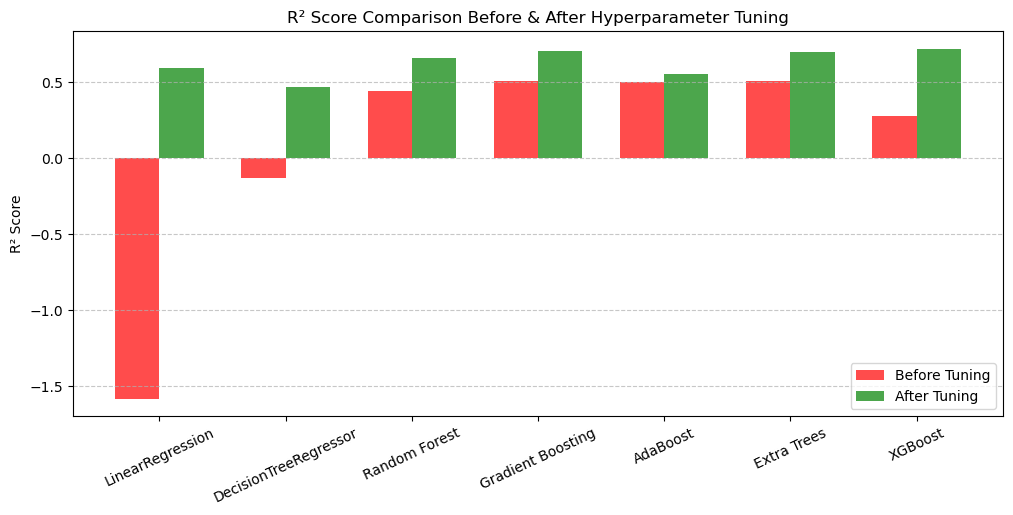

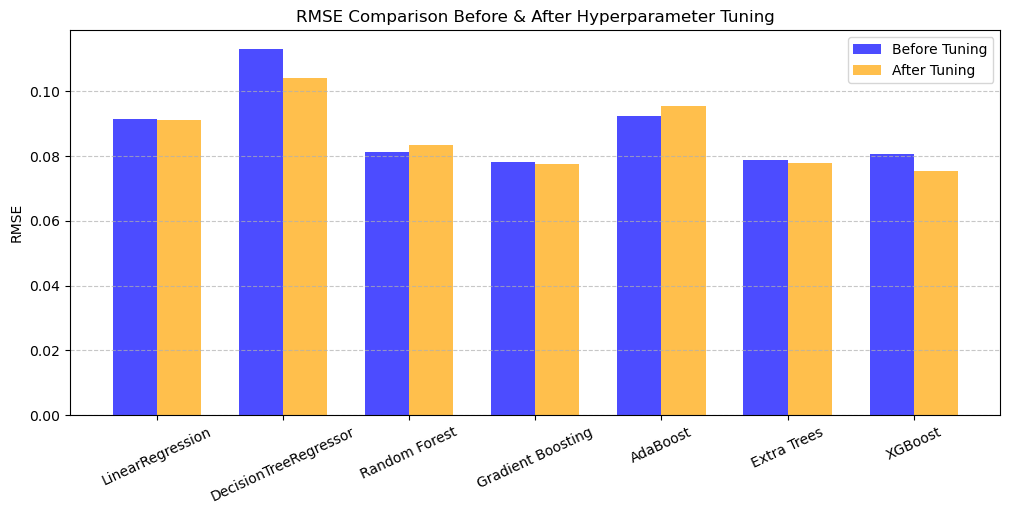

In [244]:
import numpy as np
import matplotlib.pyplot as plt

# Model Names
models = ["LinearRegression", "DecisionTreeRegressor", "Random Forest", 
          "Gradient Boosting", "AdaBoost", "Extra Trees", "XGBoost"]

# R2 Scores (Before and After Tuning)
r2_before = [-1.5842, -0.1301, 0.4419, 0.5092, 0.5025, 0.5100, 0.2787]
r2_after = [0.5915, 0.4693, 0.6596, 0.7054, 0.5546, 0.7015, 0.7216]

# RMSE (Before and After Tuning)
rmse_before = [0.0914, 0.1132, 0.0814, 0.0781, 0.0925, 0.0788, 0.0806]
rmse_after = [0.0912, 0.1040, 0.0833, 0.0775, 0.0953, 0.0780, 0.0753]

# Set bar width
bar_width = 0.35
x = np.arange(len(models))

# Plot R2 Score Comparison
plt.figure(figsize=(12, 5))
plt.bar(x - bar_width/2, r2_before, bar_width, label="Before Tuning", color="red", alpha=0.7)
plt.bar(x + bar_width/2, r2_after, bar_width, label="After Tuning", color="green", alpha=0.7)
plt.xticks(ticks=x, labels=models, rotation=25)
plt.ylabel("R² Score")
plt.title("R² Score Comparison Before & After Hyperparameter Tuning")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("r2_comparison.png", dpi=300, bbox_inches='tight')  # Save the plot
plt.show()

# Plot RMSE Comparison
plt.figure(figsize=(12, 5))
plt.bar(x - bar_width/2, rmse_before, bar_width, label="Before Tuning", color="blue", alpha=0.7)
plt.bar(x + bar_width/2, rmse_after, bar_width, label="After Tuning", color="orange", alpha=0.7)
plt.xticks(ticks=x, labels=models, rotation=25)
plt.ylabel("RMSE")
plt.title("RMSE Comparison Before & After Hyperparameter Tuning")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("rmse_comparison.png", dpi=300, bbox_inches='tight')  # Save the plot
plt.show()


In [ ]:
!pip install --upgrade numpy
!pip install --force-reinstall catboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 1.7 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/12.6 MB 1.3 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/12.6 MB 1.1 MB/s eta 0:00:11
   ---- ----------------------------------- 1.6/12.6 MB 1.4 MB/s eta 0:00:08
   ------ --------------------------------- 2.1/12.6 MB 1.6 MB/s eta 0:00:07
   -------- ------------------------------- 2.6/12.6 MB 1.5 MB/s eta 0:00:07
   ---------- ----------------------------- 3.4/12.6 MB 1.7 MB/s eta 0:00:06
   ----------- ---------------------------- 3.7/12.6 MB 1.7 MB/s eta 0:00:06
   -------------- ------------------------- 4.5/12.6 MB 1.8 MB/s eta 0:00:05
   -------------- ------------------------- 4.7/12.6 MB 1.7 MB/s eta 0:00:05
   --------------- ------------------------ 5.0/12.6 MB 1.8 MB/s eta 0:00:05
   --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [9]:
df['Men age 15 years and above wih Elevated blood pressure (Systolic â‰¥140 mm of Hg and/or Diastolic â‰¥90 mm of Hg) or taking medicine to control blood pressure (%)']

KeyError: 'Men age 15 years and above wih Elevated blood pressure (Systolic â‰¥140 mm of Hg and/or Diastolic â‰¥90 mm of Hg) or taking medicine to control blood pressure (%)'

In [11]:
df.head()


,District Names,State/UT,Number of Households surveyed,Number of Women age 15-49 years interviewed,Number of Men age 15-54 years interviewed,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Children under age 5 years whose birth was registered with the civil authority (%),...,Men age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%),Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%),Men age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%),Women (age 30-49 years) Ever undergone a screening test for cervical cancer (%),Women (age 30-49 years) Ever undergone a breast examination for breast cancer (%),Women (age 30-49 years) Ever undergone an oral cavity examination for oral cancer (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women age 15 years and above who consume alcohol (%),Men age 15 years and above who consume alcohol (%)
0,NaN,NaN,882,764,125,78.0,23.0,973,927,98.0,...,32.9,11.1,47.0,13.4,13.2,5.4,63.5,76.8,29.6,64.5
1,NaN,NaN,874,789,108,82.7,19.8,950,844,100.0,...,22.6,6.0,32.2,1.7,0.3,15.8,46.8,70.5,5.1,45.3
2,NaN,NaN,868,844,134,84.7,21.0,967,935,96.5,...,17.9,6.1,26.9,1.3,0.7,8.0,19.6,50.8,1.7,32.8
3,NaN,NaN,874,780,100,60.0,20.7,1140,1163,95.0,...,14.4,5.5,22.9,1.0,0.2,3.8,7.1,21.3,0.6,28.3
4,NaN,NaN,902,853,134,56.0,20.6,1114,898,95.4,...,14.8,6.4,25.1,4.9,0.6,7.3,11.4,21.5,0.8,32.3
